#  <center> Metabolites - Disease Detection <center>

In [ ]:
# import packages
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# metrics 
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# plotting style, you can choose your own parameters
import matplotlib

matplotlib.rcParams.update({'font.size': 15})
matplotlib.rc('lines', linewidth=3, color='g')
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams["xtick.major.size"] = 6
matplotlib.rcParams["ytick.major.size"] = 6
matplotlib.rcParams["ytick.major.width"] = 2
matplotlib.rcParams["xtick.major.width"] = 2
matplotlib.rcParams['text.usetex'] = False

In [ ]:
# A helper function for students to produce plots 
def plot_clf(model, X, y, title): 
    
    '''
        A function to plot confusion matrix and ROC curve 
        
        Args: 
            model(classifier object): model object (e.g. RandomForestClassifier, LogisticRegression)
            X(np.array): feature set
            y(np.array): label set 
            title(str): plot name
            
        Example Usage: 
            plot_clf(model, X_test, y_test, "test")
    '''
    
    fig, [ax_roc, ax_conf] = plt.subplots(1, 2, figsize=(6, 3))
    fig.tight_layout()
    
    plot_roc_curve(model, X, y, ax=ax_roc)
    plot_confusion_matrix(model, X, y, ax=ax_conf)

    ax_roc.set_title('{} ROC'.format(title))
    ax_conf.set_title('{} Confusion Mat.'.format(title))

    plt.show()

# Breast Cancer

In [ ]:
# Download data 

!wget https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps1/data/breastcancer_X.csv
!wget https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps1/data/breastcancer_y.csv

--2021-03-02 21:52:49--  https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps1/data/breastcancer_X.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 469363 (458K) [text/plain]
Saving to: ‘breastcancer_X.csv.1’

breastcancer_X.csv. 100%[===================>] 458.36K  --.-KB/s    in 0.03s   

2021-03-02 21:52:49 (17.3 MB/s) - ‘breastcancer_X.csv.1’ saved [469363/469363]

--2021-03-02 21:52:49--  https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps1/data/breastcancer_y.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response..

In [ ]:
X = pd.read_csv("./breastcancer_X.csv", header='infer', index_col=0) # Loads the input features of metabolite data into a numpy array 
y = pd.read_csv("./breastcancer_y.csv", header='infer', index_col=0) # Loads the labels associated with the array X (available training data)

metabolite_name = X.columns.tolist() # Extracts the names of metabolites from each column of the feature set X

X = X.values # Extracts and keeps only the numerical data (features)
y = y.values # Extracts and keeps only the labels from the data

In [ ]:

N_samples = X[:,0].shape # Number of data points (patients)
N_features = X[0].shape  # Number of features (metabolites) used for a diagnosis
print("There are {} samples.".format(N_samples))
print("There are {} features per sample.".format(N_features))


There are (211,) samples.
There are (128,) features per sample.


Split dataset into train and test sets

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Scale the dataset

In [ ]:

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


print the mean/variance for each transformed feature

In [ ]:

mean_train = np.mean(X_train_scaled)
mean_test = np.mean(X_test_scaled)

variance_train = np.var(X_train_scaled)
variance_test = np.var(X_test_scaled)

print("The means of the transformed training feature set are {}".format(mean_train) )
print("The means of the transformed test feature set are {}".format(mean_test) )
print("The variances of the transformed training feature set are {}".format(variance_train) )
print("The variances of the transformed test feature set are {}".format(variance_test) )


The means of the transformed training feature set are 4.7580986769649563e-17
The means of the transformed test feature set are -0.05267032782247921
The variances of the transformed training feature set are 1.0
The variances of the transformed test feature set are 1.0193295410244911


train and evaluate a Logistic Regression model

In [ ]:

clf = LogisticRegression()

clf.fit(X_train_scaled, y_train.flatten())

predict = clf.predict(X_test_scaled)

print(predict)


[1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.]


report the AUC score for both training and testing data. 

In [ ]:

from sklearn.metrics import roc_auc_score

train_auc = roc_auc_score(y_train.flatten(), clf.predict_proba(X_train_scaled)[:, 1])
test_auc = roc_auc_score(y_test.flatten(), clf.predict_proba(X_test_scaled)[:, 1])
print("The training AUC score is {}".format(train_auc) )
print("The testing AUC score is {}".format(test_auc) )


The training AUC score is 1.0
The testing AUC score is 0.9592760180995475


Generate plots for confusion matrices and ROCcurve for both training and testing.

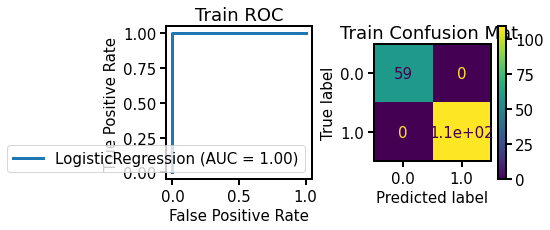

None


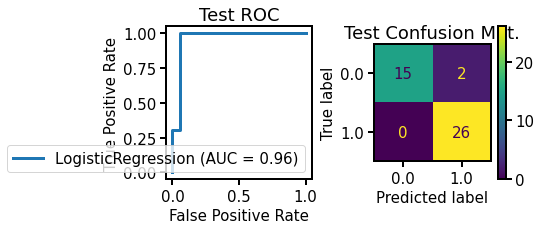

None


In [ ]:

clfplot_train = plot_clf(clf, X_train_scaled, y_train, "Train")
print(clfplot_train)

clfplot_test = plot_clf(clf, X_test_scaled, y_test, "Test")
print(clfplot_test)


Cross-validation

In [ ]:

scaler_cv = StandardScaler().fit(X)

X_scaled = scaler_cv.transform(X)

clf_cv = LogisticRegression()

crossval = cross_val_score(clf_cv, X_scaled, y.flatten(), scoring='roc_auc', cv=5)

print(crossval)


[1.         0.99753086 0.98765432 1.         0.94814815]


report the cross validated ROC-AUC score in terms of its mean and standard deviation

In [ ]:
########## Answer ############

cv_mean = np.mean(crossval)
cv_std = np.std(crossval)

print("The mean of CV scores is {}".format(cv_mean) )
print("The std of CV scores is {}".format(cv_std) )

########## Answer ############

The mean of CV scores is 0.9866666666666667
The std of CV scores is 0.01979008879951987


Identify the top 5 metabolites that positively correlated the most with positive diagnosis.

In [ ]:

# get coefficients from trained model
coefs = clf.coef_.flatten()
# sort indices with values in descending order
# since we want poisitve correlation
coefs_idx = np.argsort(coefs)[::-1]

# print(coefs)
# print(coefs_idx)
# print(metabolite_name)

# sort metabolites by cofficient indeces
metabolites = [metabolite_name[i] for i in coefs_idx]

# print(metabolites)


In [ ]:

metabolites_top5 = metabolites[0:5]

print("The top 5 metabolites are {}".format(", ".join(metabolites_top5)) )


The top 5 metabolites are 2-aminobutyric acid, 2-Butenedioic acid, 2,2'-Bipyridine, 1,2-dimethylpropanol, à-Hydroxyisobutyric acid


For each hypothetical featurization, obtain an average ROC-AUC and its standard deviation through a 5-fold CV. 

In [ ]:

import math

lenX = X_train_scaled.shape[1]
feature_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]

len_fs = len(feature_sizes)
k_fold = 5
iter = 10
cv_fs = np.zeros((iter,len_fs,k_fold))
cv_fs_mean = np.zeros((iter,k_fold))
cv_fs_std = np.zeros((iter,k_fold))

# Loop over the feature subsets for 10 times they are randomly generated
for j in range(iter):
  for fs in feature_sizes:
    i = feature_sizes.index(fs)
    random_indices = np.random.choice(lenX, size=math.floor(fs*lenX), replace=False)
    #print(X_train_scaled.shape)
    X_train_scaled_subset = X_train_scaled[:,random_indices]
    y_train_subset = y_train

    clf_fs = LogisticRegression()

    cv_fs[j,:,i] = cross_val_score(clf_fs, X_train_scaled_subset, y_train_subset.flatten(), scoring='roc_auc', cv=k_fold)

    cv_fs_mean[j,i] = np.mean(cv_fs[j,:,i])
    cv_fs_std[j,i] = np.std(cv_fs[j,:,i])

cv_fs_mean_ = np.zeros(k_fold)
cv_fs_std_ = np.zeros(k_fold)

for i in range(k_fold):
  cv_fs_mean_[i] = np.mean(cv_fs_mean[:,i])
  cv_fs_std_[i] = np.std(cv_fs_mean[:,i])

print("The mean of CV scores is {}".format(cv_fs_mean_) )
print("The std of CV scores is {}".format(cv_fs_std_) )


The mean of CV scores is [0.96248163 0.99482061 0.9988292  1.         1.        ]
The std of CV scores is [0.0416123  0.00787671 0.0016457  0.         0.        ]


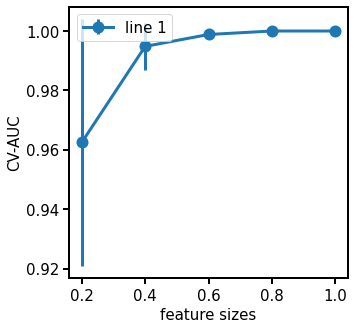

In [ ]:
# Plot results
y_auc = cv_fs_mean_
y_uncer = cv_fs_std_

# plotting code 
plt.figure(figsize=(5,5)) # define figure size 
plt.errorbar(feature_sizes, y_auc, y_uncer, marker='o', ms=10, mew=2, label='Average CV-AUC score') 
plt.xlabel('feature sizes')
plt.ylabel('CV-AUC')
plt.legend()
plt.show()

# Liver Cancer

In [ ]:
!wget https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps1/data/liver_X.csv
!wget https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps1/data/liver_y.csv

--2021-03-02 21:52:54--  https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps1/data/liver_X.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 757566 (740K) [text/plain]
Saving to: ‘liver_X.csv’

liver_X.csv         100%[===================>] 739.81K  --.-KB/s    in 0.03s   

2021-03-02 21:52:54 (25.3 MB/s) - ‘liver_X.csv’ saved [757566/757566]

--2021-03-02 21:52:54--  https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps1/data/liver_y.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1961 (1.9K) [te

In [ ]:

## Load data 
X2 = pd.read_csv("./liver_X.csv", header='infer', index_col=0)
y2 = pd.read_csv("./liver_y.csv", header='infer', index_col=0)

metabolite_name = X2.columns.tolist() # Extracts the names of metabolites from each column of the feature set X

X2 = X2.values # Extracts and keeps only the numerical data (features)
y2 = y2.values # Extracts and keeps only the labels from the data

## Split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

## Scale data
scaler2 = StandardScaler().fit(X2_train)

X2_train_scaled = scaler2.transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)


Train  a logistic  regression  model,  and  test  its  performance.

In [ ]:

## Train logistic linear regression
clf2 = LogisticRegression(penalty='none').fit(X2_train_scaled, y2_train.flatten())
predict2 = clf2.predict(X2_test_scaled)
print(predict2)

## Perfromanc metrics
train_auc2 = roc_auc_score(y2_train.flatten(), clf2.predict_proba(X2_train_scaled)[:, 1])
test_auc2 = roc_auc_score(y2_test.flatten(), clf2.predict_proba(X2_test_scaled)[:, 1])
print("The training AUC score is {}".format(train_auc2) )
print("The testing AUC score is {}".format(test_auc2) )


[0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0]
The training AUC score is 1.0
The testing AUC score is 0.7375


Generate Confusion Matrix and ROC curve

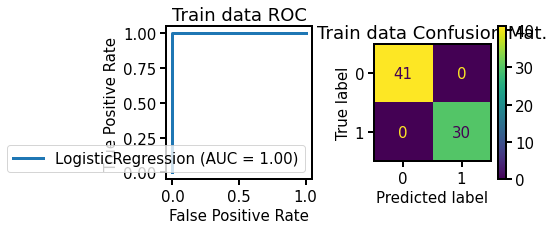

None


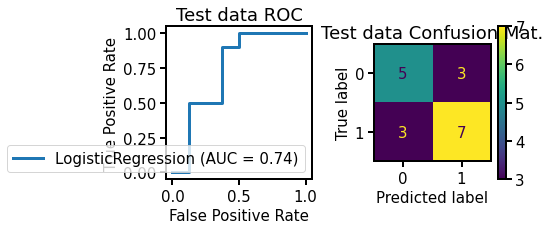

None


In [ ]:

clfplot2_train = plot_clf(clf2, X2_train_scaled, y2_train, "Train data")
print(clfplot2_train)

clfplot2_test = plot_clf(clf2, X2_test_scaled, y2_test, "Test data")
print(clfplot2_test)


In [ ]:

print("The training AUC score is {}".format(train_auc2) )
print("The testing AUC score is {}".format(test_auc2) )


The training AUC score is 1.0
The testing AUC score is 0.7375


L1-regularized Logistic Regressions

In [ ]:

clf_l1 = LogisticRegression(penalty='l1',solver='saga', max_iter=5000).fit(X2_train_scaled, y2_train.flatten())
predict_l1 = clf_l1.predict(X2_test_scaled)
print(predict_l1)


[0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0]


In [ ]:

train_auc_l1 = roc_auc_score(y2_train.flatten(), clf_l1.predict_proba(X2_train_scaled)[:, 1])
test_auc_l1 = roc_auc_score(y2_test.flatten(), clf_l1.predict_proba(X2_test_scaled)[:, 1])

print("The training AUC score is {}".format(train_auc_l1) )
print("The testing AUC score is {}".format(test_auc_l1) )


The training AUC score is 1.0
The testing AUC score is 0.8875


Generate Confusion Matrix and ROC curve

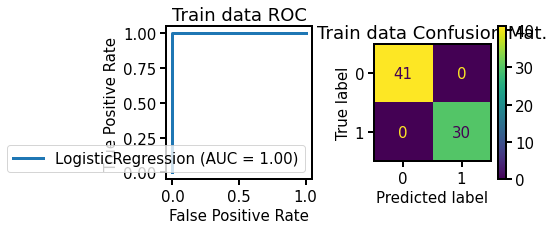

None


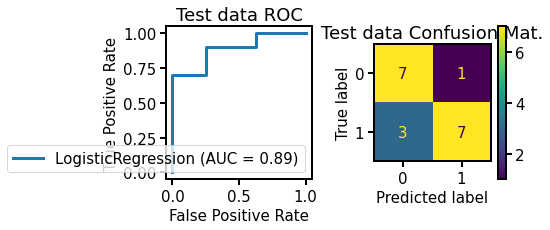

None


In [ ]:

clfplot_l1_train = plot_clf(clf_l1, X2_train_scaled, y2_train, "Train data")
print(clfplot_l1_train)

clfplot_l1_test = plot_clf(clf_l1, X2_test_scaled, y2_test, "Test data")
print(clfplot_l1_test)


Generate the histrogram of model coefficients 

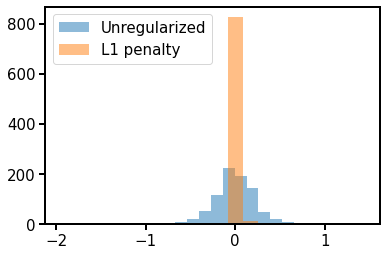

In [ ]:

coef2= clf2.coef_.transpose()
coef_l1= clf_l1.coef_.transpose()

plt.hist(coef2,bins=20, label='Unregularized', alpha=0.5)
plt.hist(coef_l1,bins=20, label='L1 penalty', alpha=0.5)
plt.legend(loc='best')
plt.show()


L2-regularized Logistic Regressions

In [ ]:

clf_l2 = LogisticRegression(penalty='l2',solver='saga', C=0.1, max_iter=5000).fit(X2_train_scaled, y2_train.flatten())
predict_l2 = clf_l2.predict(X2_test_scaled)
print(predict_l2)


[0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0]


Generate Confusion Matrix and ROC curve

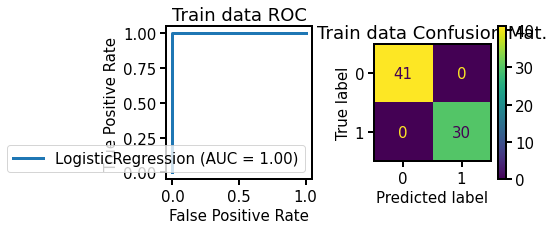

None


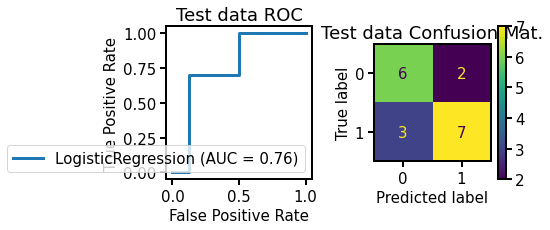

None


In [ ]:

clfplot_l2_train = plot_clf(clf_l2, X2_train_scaled, y2_train, "Train data")
print(clfplot_l2_train)

clfplot_l2_test = plot_clf(clf_l2, X2_test_scaled, y2_test, "Test data")
print(clfplot_l2_test)


In [ ]:

train_auc_l2 = roc_auc_score(y2_train.flatten(), clf_l2.predict_proba(X2_train_scaled)[:, 1])
test_auc_l2 = roc_auc_score(y2_test.flatten(), clf_l2.predict_proba(X2_test_scaled)[:, 1])

print("The training AUC score is {}".format(train_auc_l2) )
print("The testing AUC score is {}".format(test_auc_l2) )


The training AUC score is 1.0
The testing AUC score is 0.7625


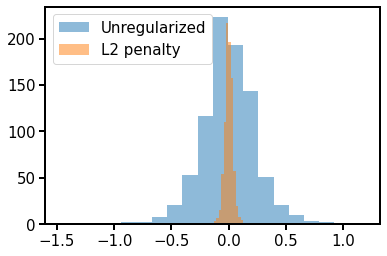

In [ ]:

coef2= clf2.coef_.transpose()
coef_l2= clf_l2.coef_.transpose()

plt.hist(coef2,bins=20, label='Unregularized', alpha=0.5)
plt.hist(coef_l2,bins=20, label='L2 penalty', alpha=0.5)
plt.legend(loc='best')
plt.show()


Parametric Sweep on un-regularized and L1-regularized logistic regressions for the following random train/test splits:

{20%/30%,30%/30%,40%/30%,50%/30%,60%/30%}.

In [ ]:

import math

train_sizes = [0.2, 0.3, 0.4, 0.5, 0.6]

len_ts = len(train_sizes)
iter = 10

train_auc_ts_un = np.zeros((iter,len_ts))
test_auc_ts_un = np.zeros((iter,len_ts))

train_auc_ts_l1 = np.zeros((iter,len_ts))
test_auc_ts_l1 = np.zeros((iter,len_ts))

# Genarate 10 random train/test data sets with required sizes
for i in range(iter):
  for ts in train_sizes:
    idx = train_sizes.index(ts)

    ## Split data
    X2_train_ts, X2_test_ts, y2_train_ts, y2_test_ts = train_test_split(X2, y2, test_size=0.3, train_size=ts)

    ## Scale data
    scaler_ts = StandardScaler().fit(X2_train_ts)
    X2_train_scaled_ts = scaler_ts.transform(X2_train_ts)
    X2_test_scaled_ts = scaler_ts.transform(X2_test_ts)

    # Train Un-regularized Logistic Regression
    clf_ts_un = LogisticRegression(penalty='none')
    clf_ts_un.fit(X2_train_scaled_ts, y2_train_ts.flatten())
    # predict_ts_un = clf_ts_un.predict(X2_test_scaled_ts)
    # print(predict_ts_un)

    train_auc_ts_un[i,idx] = roc_auc_score(y2_train_ts.flatten(), clf_ts_un.predict_proba(X2_train_scaled_ts)[:, 1])
    test_auc_ts_un[i,idx] = roc_auc_score(y2_test_ts.flatten(), clf_ts_un.predict_proba(X2_test_scaled_ts)[:, 1])

    # Train L1-regularized Logistic Regression
    clf_ts_l1 = LogisticRegression(penalty='l1',solver='saga', max_iter=5000)
    clf_ts_l1.fit(X2_train_scaled_ts, y2_train_ts.flatten())
    # predict_ts_l1 = clf_ts_l1.predict(X2_test_scaled_ts)
    # print(predict_ts_l1)

    train_auc_ts_l1[i,idx] = roc_auc_score(y2_train_ts.flatten(), clf_ts_l1.predict_proba(X2_train_scaled_ts)[:, 1])
    test_auc_ts_l1[i,idx] = roc_auc_score(y2_test_ts.flatten(), clf_ts_l1.predict_proba(X2_test_scaled_ts)[:, 1])

train_auc_ts_un_mean = np.zeros(len_ts)
test_auc_ts_un_mean = np.zeros(len_ts)

train_auc_ts_l1_mean = np.zeros(len_ts)
test_auc_ts_l1_mean = np.zeros(len_ts)

train_auc_ts_un_var = np.zeros(len_ts)
test_auc_ts_un_var = np.zeros(len_ts)

train_auc_ts_l1_var = np.zeros(len_ts)
test_auc_ts_l1_var = np.zeros(len_ts)

for i in range(len_ts):
  train_auc_ts_un_mean[i] = np.mean(train_auc_ts_un[:,i])
  test_auc_ts_un_mean[i] = np.mean(test_auc_ts_un[:,i])

  train_auc_ts_l1_mean[i] = np.mean(train_auc_ts_l1[:,i])
  test_auc_ts_l1_mean[i] = np.mean(test_auc_ts_l1[:,i])

  train_auc_ts_un_var[i] = np.var(train_auc_ts_un[:,i])
  test_auc_ts_un_var[i] = np.var(test_auc_ts_un[:,i])

  train_auc_ts_l1_var[i] = np.var(train_auc_ts_l1[:,i])
  test_auc_ts_l1_var[i] = np.var(test_auc_ts_l1[:,i])

print('Means')
print(train_auc_ts_un_mean)
print(test_auc_ts_un_mean)
print(train_auc_ts_l1_mean)
print(test_auc_ts_l1_mean)
print('Vars')
print(train_auc_ts_un_var)
print(test_auc_ts_un_var)
print(train_auc_ts_l1_var)
print(test_auc_ts_l1_var)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Means
[1. 1. 1. 1. 1.]
[0.57663511 0.61531318 0.59397166 0.60512029 0.64849633]
[1. 1. 1. 1. 1.]
[0.60257395 0.71654991 0.78454273 0.78816302 0.8189522 ]
Vars
[0. 0. 0. 0. 0.]
[0.00520741 0.00799116 0.00627444 0.01064074 0.00943731]
[0. 0. 0. 0. 0.]
[0.01094842 0.01426277 0.00811065 0.00359452 0.0060359 ]


Plot training/testing ROC-AUC score as a function of train size for L1-regularized and un-regularized regressions.

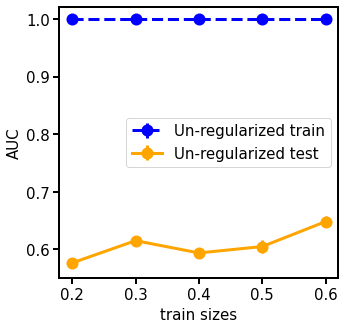

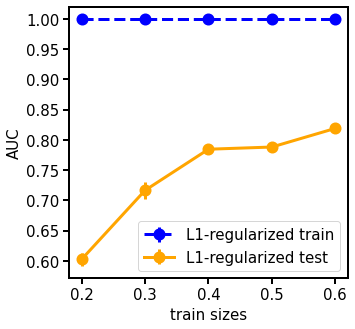

In [ ]:

y_auc_train_un = train_auc_ts_un_mean
y_uncer_train_un = train_auc_ts_un_var

y_auc_test_un = test_auc_ts_un_mean
y_uncer_test_un = test_auc_ts_un_var

## Create plots for L1-regularized results
# Define plots 
plt.figure(figsize=(5,5))

# first plot
plt.errorbar(train_sizes, y_auc_train_un, y_uncer_train_un,
             marker='o', color='blue', linestyle='--',
             ms=10, mew=2, label='Un-regularized train')

# 2nd plot
plt.errorbar(train_sizes, y_auc_test_un, y_uncer_test_un, 
             marker='o', color='orange',  ms=10, linestyle='-', 
             mew=2, label='Un-regularized test') # plotting for test score

plt.xlabel('train sizes')
plt.ylabel('AUC')
plt.legend()
plt.show()

#################################################################

y_auc_train_l1 = train_auc_ts_l1_mean
y_uncer_train_l1 = train_auc_ts_l1_var

y_auc_test_l1 = test_auc_ts_l1_mean
y_uncer_test_l1 = test_auc_ts_l1_var

## Create plots for L1-regularized results
# Define plots 
plt.figure(figsize=(5,5))

# first plot
plt.errorbar(train_sizes, y_auc_train_l1, y_uncer_train_l1,
             marker='o', color='blue', linestyle='--',
             ms=10, mew=2, label='L1-regularized train')

# 2nd plot
plt.errorbar(train_sizes, y_auc_test_l1, y_uncer_test_l1, 
             marker='o', color='orange',  ms=10, linestyle='-', 
             mew=2, label='L1-regularized test') # plotting for test score

plt.xlabel('train sizes')
plt.ylabel('AUC')
plt.legend()
plt.show()

########### Code #############

Cross-validation for a Random Forest Classifier

In [ ]:

clf3 = RandomForestClassifier(n_estimators=20, max_depth=2)

# scaler3 = StandardScaler().fit(X2)
# X2_scaled = scaler3.transform(X2)

cv3 = cross_val_score(clf3, X2, y2.flatten(), scoring='roc_auc', cv=5)


In [ ]:

cv3_mean = cv3.mean()
cv3_std = cv3.std()

print("The mean of CV scores is {}".format(cv3_mean) )
print("The std of CV scores is {}".format(cv3_std) )


The mean of CV scores is 0.6811111111111112
The std of CV scores is 0.12819557300574624


In [ ]:
parameters = {'n_estimators': [40, 80, 160, 320, 640, 1280], 
              'min_samples_split': [8, 10, 12, 24], 
              'max_depth': [2, 4, 8]}

Grid Hyperparameter Search with Cross Validation

In [ ]:

clf3_cv = RandomForestClassifier()

ghs_cv = GridSearchCV(clf3_cv, parameters, scoring='roc_auc', cv=5)

ghs_cv.fit(X2_train_scaled,y2_train.flatten())


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:

print(ghs_cv.best_estimator_)

print(ghs_cv.best_params_)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=640,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'max_depth': 8, 'min_samples_split': 12, 'n_estimators': 640}


In [ ]:

cv_auc_best = ghs_cv.best_score_

print("The best cross-validated AUC score is {}".format(cv_auc_best))


The best cross-validated AUC score is 0.7689814814814815


Validate on the validation( held-out) data

In [ ]:

# Validate on the 20% test data from the original split
val_auc = ghs_cv.score(X2_test_scaled,y2_test)

clf3_base = clf3.fit(X2_train_scaled,y2_train.flatten())
val_auc_base = clf3_base.score(X2_test_scaled,y2_test)


In [ ]:

print("The validation AUC score calculated with the base model is {}".format(val_auc_base))
print("The validation AUC score calculated with the best model is {}".format(val_auc))


The validation AUC score calculated with the base model is 0.6666666666666666
The validation AUC score calculated with the best model is 0.875
